<h2 align=center>Exploratory Data Analysis With Python and Pandas</h2>
<img src="logo.png">

### Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from pandas_profiling import ProfileReport

Link to data source: https://www.kaggle.com/aungpyaeap/supermarket-sales

**Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Data Dictionary**

1. ***Invoice id:*** Computer generated sales slip invoice identification number

2. ***Branch:*** Branch of supercenter (3 branches are available identified by A, B and C).

3. ***City:*** Location of supercenters

4. ***Customer type:*** Type of customers, recorded by Members for customers using member card and Normal for without member card.

5. ***Gender:*** Gender type of customer

6. ***Product line:*** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

7. ***Unit price:*** Price of each product in USD

8. ***Quantity:*** Number of products purchased by customer

9. ***Tax:*** 5% tax fee for customer buying

10. ***Total:*** Total price including tax

11. ***Date:*** Date of purchase (Record available from January 2019 to March 2019)

12. ***Time:*** Purchase time (10am to 9pm)

13. ***Payment:*** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

14. ***COGS:*** Cost of goods sold

15. ***Gross margin percentage:*** Gross margin percentage

16. ***Gross income:*** Gross income

17. ***Rating:*** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

### Task 1: Initial Data Exploration

In [6]:
supmk_data = pd.read_csv("supermarket_sales.csv")

In [7]:
supmk_data.head(10)

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   
5  699-14-3026      C  Naypyitaw        Normal    Male   
6  355-53-5943      A     Yangon        Member  Female   
7  315-22-5665      C  Naypyitaw        Normal  Female   
8  665-32-9167      A     Yangon        Member  Female   
9  692-92-5582      B   Mandalay        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Total     Date  \
0       Health and beauty       74.69       7.0  26.1415  548.9715   1/5/19   
1  Electronic accessories       15.28       5.0   3.8200   80.2200   3/8/19   
2      Home and lifestyle       46.33       7.0  16.2155  340.5255   3/3/19   
3       Health and beauty       58.22       8.0  23.2880  489.0480  1/27/19   
4       Sports and travel       86.31       7.0  30.2085  634.3785   2/8/19   
5  Electronic accessories       85.39       7.0  29.8865  627.6165  3/25/19   
6                     NaN       68.84       6.0  20.6520  433.6920  2/25/19   
7                     NaN       73.56      10.0  36.7800  772.3800  2/24/19   
8                     NaN       36.26       2.0   3.6260   76.1460  1/10/19   
9                     NaN       54.84       3.0   8.2260  172.7460  2/20/19   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3  
5  18:30      Ewallet  597.73                 4.761905       29.8865     4.1  
6  14:36      Ewallet  413.04                 4.761905       20.6520     5.8  
7  11:38      Ewallet  735.60                 4.761905       36.7800     8.0  
8  17:15  Credit card   72.52                 4.761905        3.6260     7.2  
9  13:27  Credit card  164.52                 4.761905        8.2260     5.9

In [8]:
supmk_data.tail(10)

Invoice ID Branch       City Customer type  Gender  \
993   690-01-6631      B   Mandalay        Normal    Male   
994   652-49-6720      C  Naypyitaw        Member  Female   
995   233-67-5758      C  Naypyitaw        Normal    Male   
996   303-96-2227      B   Mandalay        Normal  Female   
997   727-02-1313      A     Yangon        Member    Male   
998   347-56-2442      A     Yangon        Normal    Male   
999   849-09-3807      A     Yangon        Member  Female   
1000  849-09-3807      A     Yangon        Member  Female   
1001  745-74-0715      A     Yangon        Normal    Male   
1002  452-04-8808      B   Mandalay        Normal    Male   

                Product line  Unit price  Quantity   Tax 5%      Total  \
993      Fashion accessories         NaN      10.0   8.7450   183.6450   
994   Electronic accessories         NaN       1.0   3.0475    63.9975   
995        Health and beauty         NaN       1.0   2.0175    42.3675   
996       Home and lifestyle         NaN      10.0  48.6900  1022.4900   
997       Food and beverages         NaN       1.0   1.5920    33.4320   
998       Home and lifestyle       65.82       1.0   3.2910    69.1110   
999      Fashion accessories       88.34       7.0  30.9190   649.2990   
1000     Fashion accessories       88.34       7.0  30.9190   649.2990   
1001  Electronic accessories         NaN       2.0   5.8030   121.8630   
1002  Electronic accessories       87.08       NaN  30.4780   640.0380   

         Date   Time  Payment    cogs  gross margin percentage  gross income  \
993   2/22/19  18:35  Ewallet  174.90                 4.761905        8.7450   
994   2/18/19  11:40  Ewallet   60.95                 4.761905        3.0475   
995   1/29/19  13:46  Ewallet   40.35                 4.761905        2.0175   
996    3/2/19  17:16  Ewallet  973.80                 4.761905       48.6900   
997    2/9/19  13:22     Cash   31.84                 4.761905        1.5920   
998   2/22/19  15:33     Cash   65.82                 4.761905        3.2910   
999   2/18/19  13:28     Cash  618.38                 4.761905       30.9190   
1000  2/18/19  13:28     Cash  618.38                 4.761905       30.9190   
1001  3/10/19  20:46  Ewallet  116.06                 4.761905        5.8030   
1002  1/26/19  15:17     Cash  609.56                 4.761905       30.4780   

      Rating  
993      6.6  
994      5.9  
995      6.2  
996      4.4  
997      7.7  
998      4.1  
999      6.6  
1000     6.6  
1001     8.8  
1002     5.5

In [9]:
supmk_data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [12]:
supmk_data.Date = pd.to_datetime(supmk_data.Date)
supmk_data.set_index(supmk_data.Date, inplace=True)

In [13]:
supmk_data.head()

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-05  750-67-8428      A     Yangon        Member  Female   
2019-03-08  226-31-3081      C  Naypyitaw        Normal  Female   
2019-03-03  631-41-3108      A     Yangon        Normal    Male   
2019-01-27  123-19-1176      A     Yangon        Member    Male   
2019-02-08  373-73-7910      A     Yangon        Normal    Male   

                      Product line  Unit price  Quantity   Tax 5%     Total  \
Date                                                                          
2019-01-05       Health and beauty       74.69       7.0  26.1415  548.9715   
2019-03-08  Electronic accessories       15.28       5.0   3.8200   80.2200   
2019-03-03      Home and lifestyle       46.33       7.0  16.2155  340.5255   
2019-01-27       Health and beauty       58.22       8.0  23.2880  489.0480   
2019-02-08       Sports and travel       86.31       7.0  30.2085  634.3785   

                 Date   Time      Payment    cogs  gross margin percentage  \
Date                                                                         
2019-01-05 2019-01-05  13:08      Ewallet  522.83                 4.761905   
2019-03-08 2019-03-08  10:29         Cash   76.40                 4.761905   
2019-03-03 2019-03-03  13:23  Credit card  324.31                 4.761905   
2019-01-27 2019-01-27  20:33      Ewallet  465.76                 4.761905   
2019-02-08 2019-02-08  10:37      Ewallet  604.17                 4.761905   

            gross income  Rating  
Date                              
2019-01-05       26.1415     9.1  
2019-03-08        3.8200     9.6  
2019-03-03       16.2155     7.4  
2019-01-27       23.2880     8.4  
2019-02-08       30.2085     5.3

In [14]:
supmk_data.describe()

Unit price    Quantity       Tax 5%        Total         cogs  \
count  996.000000  983.000000  1003.000000  1003.000000  1003.000000   
mean    55.764568    5.501526    15.400368   323.407726   308.007358   
std     26.510165    2.924673    11.715192   246.019028   234.303836   
min     10.080000    1.000000     0.508500    10.678500    10.170000   
25%     33.125000    3.000000     5.894750   123.789750   117.895000   
50%     55.420000    5.000000    12.096000   254.016000   241.920000   
75%     78.085000    8.000000    22.539500   473.329500   450.790000   
max     99.960000   10.000000    49.650000  1042.650000   993.000000   

       gross margin percentage  gross income       Rating  
count             1.003000e+03   1003.000000  1003.000000  
mean              4.761905e+00     15.400368     6.972682  
std               6.220351e-14     11.715192     1.717647  
min               4.761905e+00      0.508500     4.000000  
25%               4.761905e+00      5.894750     5.500000  
50%               4.761905e+00     12.096000     7.000000  
75%               4.761905e+00     22.539500     8.500000  
max               4.761905e+00     49.650000    10.000000

In [15]:
supmk_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1003 entries, 2019-01-05 to 2019-01-26
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1003 non-null   object        
 1   Branch                   1003 non-null   object        
 2   City                     1003 non-null   object        
 3   Customer type            924 non-null    object        
 4   Gender                   1003 non-null   object        
 5   Product line             960 non-null    object        
 6   Unit price               996 non-null    float64       
 7   Quantity                 983 non-null    float64       
 8   Tax 5%                   1003 non-null   float64       
 9   Total                    1003 non-null   float64       
 10  Date                     1003 non-null   datetime64[ns]
 11  Time                     1003 non-null   object        
 12  Payment         

### Task 2: Univariate Analysis

**Question 1:** What does the distribution of customer ratings looks like? Is it skewed?

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


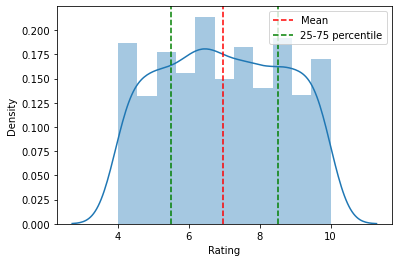

In [23]:
sns.distplot(supmk_data.Rating)
plt.axvline(x = np.mean(supmk_data.Rating), c = 'red' ,ls = '--', label = 'Mean')
plt.axvline(x = np.percentile(supmk_data.Rating,25) , c = 'green' ,ls = '--', label = '25-75 percentile')
plt.axvline(x = np.percentile(supmk_data.Rating,75) , c = 'green' ,ls = '--')
plt.legend()

array([[<AxesSubplot:title={'center':'Unit price'}>,
        <AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Tax 5%'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'cogs'}>,
        <AxesSubplot:title={'center':'gross margin percentage'}>],
       [<AxesSubplot:title={'center':'gross income'}>,
        <AxesSubplot:title={'center':'Rating'}>, <AxesSubplot:>]],
      dtype=object)

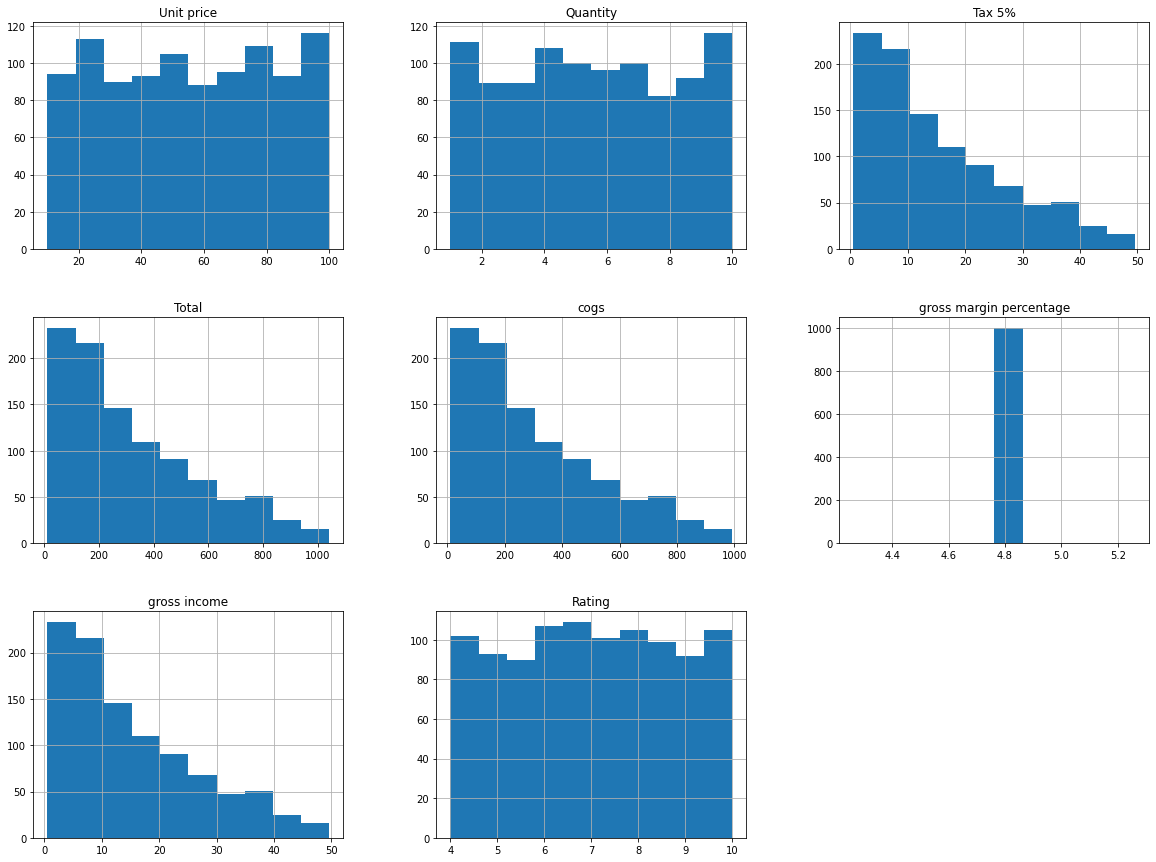

In [26]:
supmk_data.hist(figsize = (20,15))

**Question 2:** Do aggregate sales numbers differ by much between branches?

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Branch', ylabel='count'>

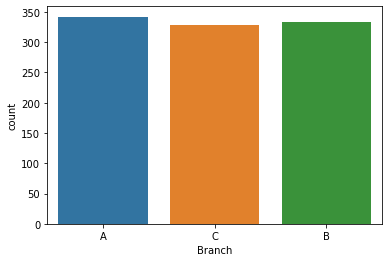

In [27]:
sns.countplot(supmk_data['Branch'])

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Payment', ylabel='count'>

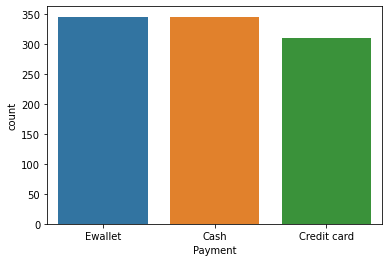

In [28]:
sns.countplot(supmk_data['Payment'])

### Task 3: Bivariate Analysis

**Question 3:** Is there a relationship between gross income and customer ratings?

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='gross income'>

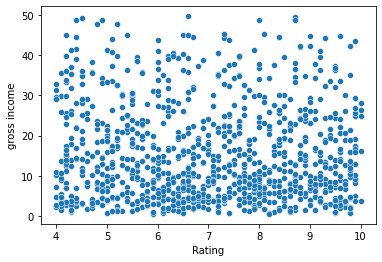

In [30]:
sns.scatterplot(supmk_data['Rating'], supmk_data['gross income'])

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='gross income'>

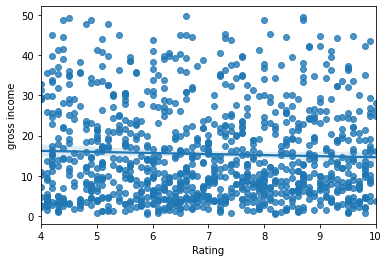

In [31]:
sns.regplot(supmk_data['Rating'], supmk_data['gross income'])

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Branch', ylabel='gross income'>

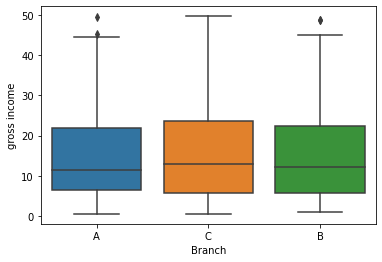

In [32]:
sns.boxplot(supmk_data['Branch'], supmk_data['gross income'])

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Branch', ylabel='gross income'>

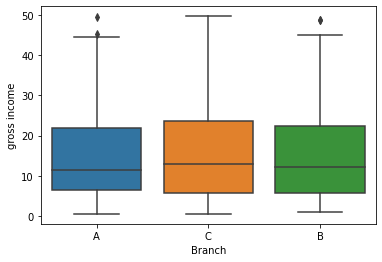

In [33]:
sns.boxplot(supmk_data['Branch'], supmk_data['gross income'])


In [ ]:
sns.boxplot(supmk_data['Gender'], supmk_data['gross income'])

**Question 4:** Is there a noticeable time trend in gross income?

In [38]:
# To check the trend we need to group by the index(Date)
temp_data = supmk_data.groupby(supmk_data.index).mean()

<AxesSubplot:xlabel='Date', ylabel='gross income'>

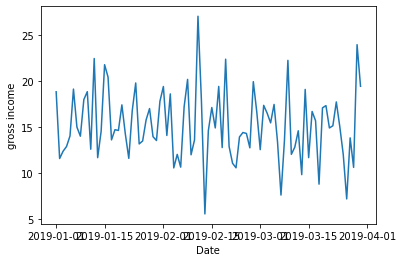

In [39]:
sns.lineplot(x = temp_data.index, y=temp_data['gross income'])

### Task 4: Dealing With Duplicate Rows and Missing Values

In [40]:
supmk_data.duplicated().sum()

3

In [41]:
supmk_data.drop_duplicates(inplace=True)

In [44]:
print(supmk_data.isna().sum())

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  6
Quantity                   19
Tax 5%                      0
Total                       0
Date                        0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64


<AxesSubplot:ylabel='Date'>

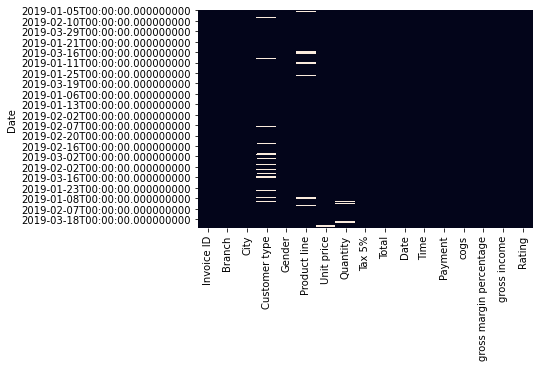

In [46]:
sns.heatmap(supmk_data.isna(),cbar = False)

In [48]:
supmk_data.fillna(supmk_data.mean(),inplace = True) # for numerical data
supmk_data.fillna(supmk_data.mode().iloc[0],inplace = True)

<ipython-input-48-efa2b767ae8a>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  supmk_data.fillna(supmk_data.mean(),inplace = True) # for numerical data


<AxesSubplot:ylabel='Date'>

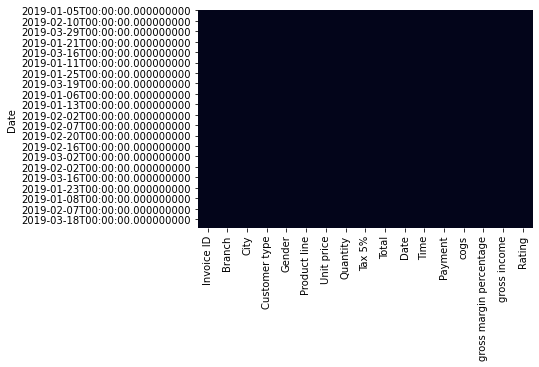

In [49]:
sns.heatmap(supmk_data.isna(),cbar = False)

In [51]:
dataset = pd.read_csv('supermarket_sales.csv')
profile = ProfileReport(dataset)
profile

### Task 5: Correlation Analysis

In [53]:
round(np.corrcoef(supmk_data['gross income'], supmk_data['Rating'])[1][0],2)

-0.04

In [56]:
np.round(supmk_data.corr(),2)

Unit price  Quantity  Tax 5%  Total  cogs  \
Unit price                     1.00      0.01    0.63   0.63  0.63   
Quantity                       0.01      1.00    0.70   0.70  0.70   
Tax 5%                         0.63      0.70    1.00   1.00  1.00   
Total                          0.63      0.70    1.00   1.00  1.00   
cogs                           0.63      0.70    1.00   1.00  1.00   
gross margin percentage       -0.00     -0.00    0.00   0.00  0.00   
gross income                   0.63      0.70    1.00   1.00  1.00   
Rating                        -0.01     -0.02   -0.04  -0.04 -0.04   

                         gross margin percentage  gross income  Rating  
Unit price                                  -0.0          0.63   -0.01  
Quantity                                    -0.0          0.70   -0.02  
Tax 5%                                       0.0          1.00   -0.04  
Total                                        0.0          1.00   -0.04  
cogs                                         0.0          1.00   -0.04  
gross margin percentage                      1.0          0.00    0.00  
gross income                                 0.0          1.00   -0.04  
Rating                                       0.0         -0.04    1.00

<AxesSubplot:>

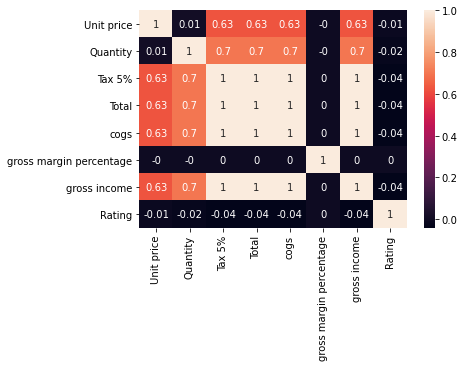

In [57]:
sns.heatmap(np.round(supmk_data.corr(),2), annot=True)

### Helpful Links

1. More visualizations: https://www.data-to-viz.com/
2. Seaborn gallery: https://seaborn.pydata.org/examples/index.html
3. Pandas profiling documentation: https://pypi.org/project/pandas-profiling/